In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q ultralytics

import os
import random


BASE_PATH = '/content/drive/MyDrive/inDrive_hackathon'
DATA_PATH = os.path.join(BASE_PATH, 'data')
DAMAGE_DATA_DIR = os.path.join(DATA_PATH, 'processed', 'damage_dataset_yolo')
MODELS_PATH = os.path.join(BASE_PATH, 'models')
os.makedirs(MODELS_PATH, exist_ok=True)

DATA_YAML_PATH = os.path.join(DAMAGE_DATA_DIR, 'data.yaml')

if not os.path.exists(DATA_YAML_PATH):
    print("❌ ERROR: data.yaml file not found!")
    print(f"Please check that this path is correct: {DATA_YAML_PATH}")
else:
    print("✅ Setup complete! data.yaml found.")
    print(f"Dataset directory: {DAMAGE_DATA_DIR}")

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.9 MB/s eta 0:00:00
✅ Setup complete! data.yaml found.
Dataset directory: /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo


In [ ]:
print("Creating train/validation splits...")

TRAIN_RATIO = 0.8

images_dir = os.path.join(DAMAGE_DATA_DIR, 'images')
all_image_paths = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(all_image_paths)

split_index = int(len(all_image_paths) * TRAIN_RATIO)

train_files = all_image_paths[:split_index]
val_files = all_image_paths[split_index:]

train_txt_path = os.path.join(DAMAGE_DATA_DIR, 'train.txt')
with open(train_txt_path, 'w') as f:
    f.write('\n'.join(train_files))

val_txt_path = os.path.join(DAMAGE_DATA_DIR, 'val.txt')
with open(val_txt_path, 'w') as f:
    f.write('\n'.join(val_files))

print(f"Successfully created splits:")
print(f"  - Training images: {len(train_files)}")
print(f"  - Validation images: {len(val_files)}")
print(f"Split files saved at: {DAMAGE_DATA_DIR}")

Creating train/validation splits...
Successfully created splits:
  - Training images: 2748
  - Validation images: 687
Split files saved at: /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo


In [ ]:
import yaml

print(f"Updating {DATA_YAML_PATH} to use the new split files...")

with open(DATA_YAML_PATH, 'r') as f:
    data = yaml.safe_load(f)

data['train'] = train_txt_path
data['val'] = val_txt_path
if 'test' in data:
    del data['test']

with open(DATA_YAML_PATH, 'w') as f:
    yaml.dump(data, f, sort_keys=False)

print("\n--- Contents of updated data.yaml ---")
with open(DATA_YAML_PATH, 'r') as f:
    print(f.read())

print("\n✅ data.yaml updated successfully!")

Updating /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/data.yaml to use the new split files...

--- Contents of updated data.yaml ---
path: /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo
train: /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/train.txt
val: /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/val.txt
names:
- scratch
- dent
- rust


✅ data.yaml updated successfully!


In [ ]:

from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.train(
    data=DATA_YAML_PATH,
    epochs=100,
    imgsz=640,
    project=MODELS_PATH,
    name='damage_detection_run2_debiased'
)

print("\n🎉 Training complete!")
print("Your trained model and results are saved in:")
print(f"{MODELS_PATH}/damage_detection_run1")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


train: Scanning /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/labels... 1224 images, 1524 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2748/2748 0.6it/s 1:21:24
train: New cache created: /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 443, len(boxes) = 2041. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.1±0.3 ms, read: 0.3±0.3 MB/s, size: 283.5 KB)
val: Scanning /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/labels... 118 images, 400 backgrounds, 0

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


val: Scanning /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/labels... 287 images, 400 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 687/687 0.6it/s 18:40
val: New cache created: /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 96, len(boxes) = 459. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/drive/.shortcut-targets-by-id/1jI3yj1lXVAdet5Vh3Ks3EbNg4FODjWGJ/inDrive_hackathon/models/damage_detection_run2_debiased/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(dec


image 1/1 /content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/images/damage_00362.jpg: 416x640 2 scratchs, 39.3ms
Speed: 2.1ms preprocess, 39.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


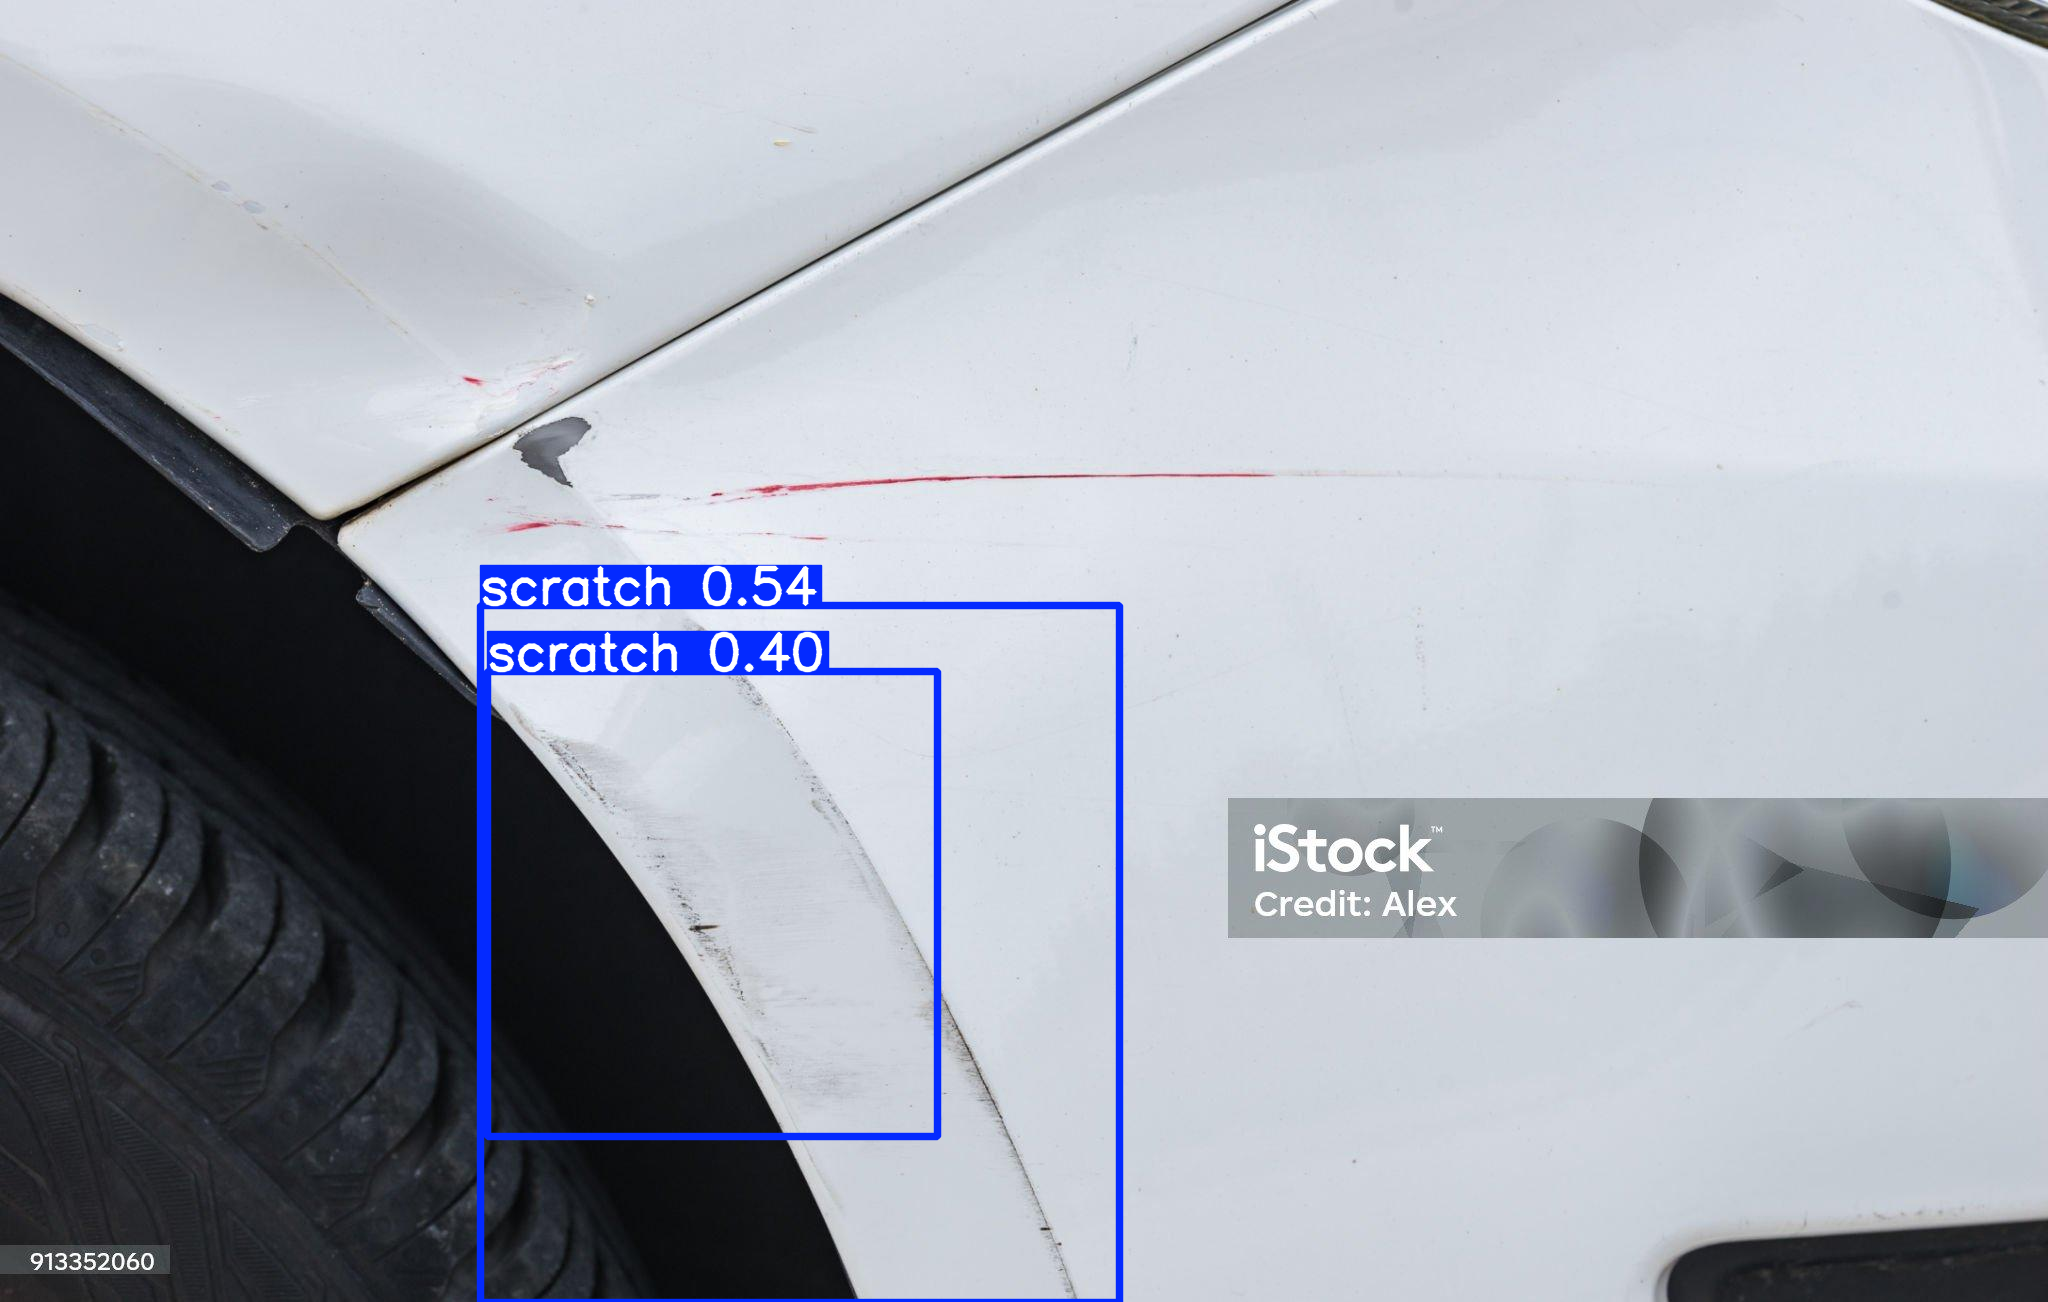

In [ ]:

from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2


BEST_MODEL_PATH = '/content/drive/MyDrive/inDrive_hackathon/models/damage_detection_run1/weights/best.pt'
model = YOLO(BEST_MODEL_PATH)
TEST_IMAGE_PATH = '/content/drive/MyDrive/inDrive_hackathon/data/processed/damage_dataset_yolo/images/damage_00362.jpg'

# --- Run inference ---
results = model(TEST_IMAGE_PATH)
annotated_image = results[0].plot()
cv2_imshow(annotated_image)

Please upload an image to test:


Saving 71-torino-pulled-into-the-dealership-that-i-work-at-today-v0-jitu2nih3lnf1.webp to 71-torino-pulled-into-the-dealership-that-i-work-at-today-v0-jitu2nih3lnf1.webp

Running inference on: 71-torino-pulled-into-the-dealership-that-i-work-at-today-v0-jitu2nih3lnf1.webp

image 1/1 /content/71-torino-pulled-into-the-dealership-that-i-work-at-today-v0-jitu2nih3lnf1.webp: 480x640 (no detections), 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


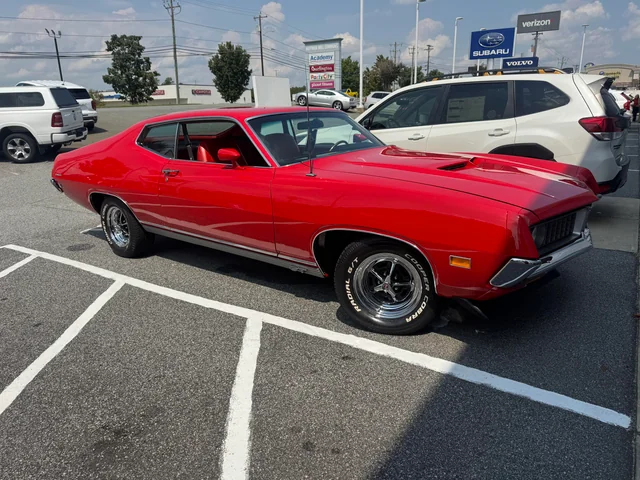

In [ ]:

from ultralytics import YOLO
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2


BEST_MODEL_PATH = '/content/drive/MyDrive/inDrive_hackathon/models/damage_detection_run1/weights/best.pt'
model = YOLO(BEST_MODEL_PATH)
print("Please upload an image to test:")
uploaded = files.upload()
if not uploaded:
    print("\nNo file was uploaded. Please run the cell again.")
else:
    test_image_name = list(uploaded.keys())[0]
    print(f"\nRunning inference on: {test_image_name}")
    results = model(test_image_name)
    annotated_image = results[0].plot()
    cv2_imshow(annotated_image)